In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse as arg

In [2]:
ap = arg.ArgumentParser()
ap.add_argument("-o", "--output"). required=True,
help=("path to the output loss/accuracy plot")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -o/--output


SystemExit: 2

C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
 #grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [4]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [5]:
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [6]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [7]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 5s 8ms/step - loss: 2.2799 - accuracy: 0.2049 - val_loss: 2.2392 - val_accuracy: 0.2948
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 2.2067 - accuracy: 0.3864 - val_loss: 2.1649 - val_accuracy: 0.4694
Epoch 3/100
469/469 [==============================] - 4s 7ms/step - loss: 2.1204 - accuracy: 0.5224 - val_loss: 2.0608 - val_accuracy: 0.5407
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 1.9962 - accuracy: 0.5903 - val_loss: 1.9104 - val_accuracy: 0.6226
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 1.8236 - accuracy: 0.6382 - val_loss: 1.7115 - val_accuracy: 0.6845
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 1.6146 - accuracy: 0.6802 - val_loss: 1.4911 - val_accuracy: 0.7085
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 1.4016 - accuracy: 0.7150 - val_loss: 1.

469/469 [==============================] - 4s 9ms/step - loss: 0.3175 - accuracy: 0.9089 - val_loss: 0.3055 - val_accuracy: 0.9132
Epoch 58/100
469/469 [==============================] - 4s 9ms/step - loss: 0.3158 - accuracy: 0.9093 - val_loss: 0.3040 - val_accuracy: 0.9134
Epoch 59/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3141 - accuracy: 0.9100 - val_loss: 0.3024 - val_accuracy: 0.9144
Epoch 60/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3125 - accuracy: 0.9099 - val_loss: 0.3012 - val_accuracy: 0.9150
Epoch 61/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3109 - accuracy: 0.9103 - val_loss: 0.3003 - val_accuracy: 0.9151
Epoch 62/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3094 - accuracy: 0.9108 - val_loss: 0.2981 - val_accuracy: 0.9152
Epoch 63/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3079 - accuracy: 0.9112 - val_loss: 0.2973 - val_accuracy: 0.9157
Epoch

In [8]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.93      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.90      0.89      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



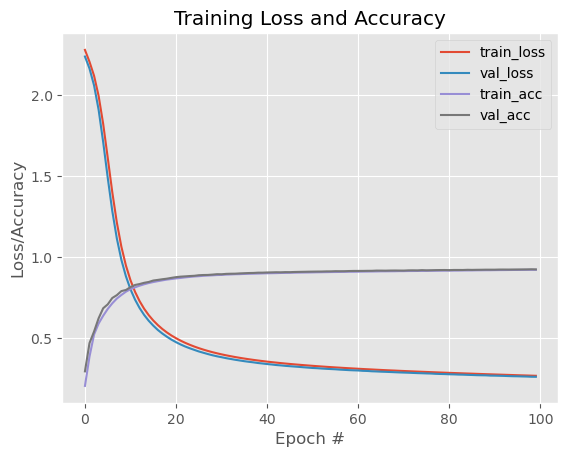

In [9]:
# plot the training loss and accura
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("output")

NameError: name 'args' is not defined

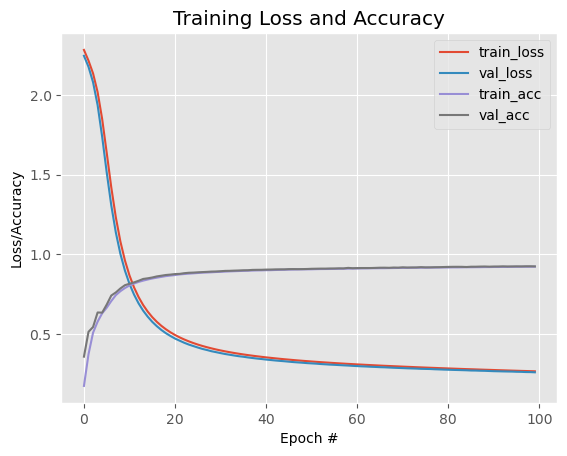

In [12]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])